#Take any Dataset of your choice, perform EDA(Exploratory Data Analysis) and apply a suitable Classifier,Regressor or Clusterer and calculate the accuracy of the model.


In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploratory Data Analysis


In [4]:
#reading the dataset 
df=pd.read_csv('grades data.csv')

In [5]:
df = df.reindex(np.random.permutation(df.index))

In [6]:
df.head(10)

,exam,student_id,grade
38,4,9,87.0
24,3,5,89.0
27,3,8,72.0
5,1,6,NaN
4,1,5,89.0
0,1,1,86.0
21,3,2,80.0
30,4,1,NaN
14,2,5,NaN
7,1,8,56.0


In [7]:
df.tail(5)

,exam,student_id,grade
25,3,6,90.0
36,4,7,85.0
11,2,2,60.0
48,5,9,97.0
29,3,10,75.0


In [8]:
df.dtypes

exam            int64
student_id      int64
grade         float64
dtype: object

In [9]:
df.shape

(50, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 38 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam        50 non-null     int64  
 1   student_id  50 non-null     int64  
 2   grade       45 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.6 KB


In [11]:
df.describe()

,exam,student_id,grade
count,50.000000,50.000000,45.000000
mean,3.000000,5.500000,84.177778
std,1.428571,2.901442,10.052790
min,1.000000,1.000000,56.000000
25%,2.000000,3.000000,79.000000
50%,3.000000,5.500000,86.000000
75%,4.000000,8.000000,91.000000
max,5.000000,10.000000,100.000000


In [12]:
df.size

150

Check for missing Values

In [13]:
df.isnull().sum()

exam          0
student_id    0
grade         5
dtype: int64

Visualising the missing values

In [14]:
import seaborn as sns

<Axes: >

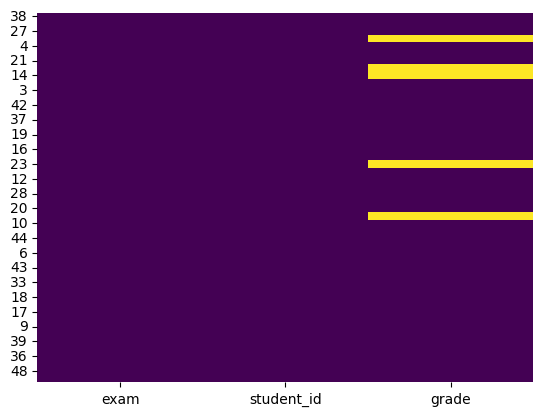

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

Replacing the missing values


In [16]:
df['grade'].fillna(df['grade'].mean(), inplace=True)

In [17]:
df.isnull().sum()

exam          0
student_id    0
grade         0
dtype: int64

In [18]:
df

,exam,student_id,grade
38,4,9,87.000000
24,3,5,89.000000
27,3,8,72.000000
5,1,6,84.177778
4,1,5,89.000000
0,1,1,86.000000
21,3,2,80.000000
30,4,1,84.177778
14,2,5,84.177778
7,1,8,56.000000


<Axes: >

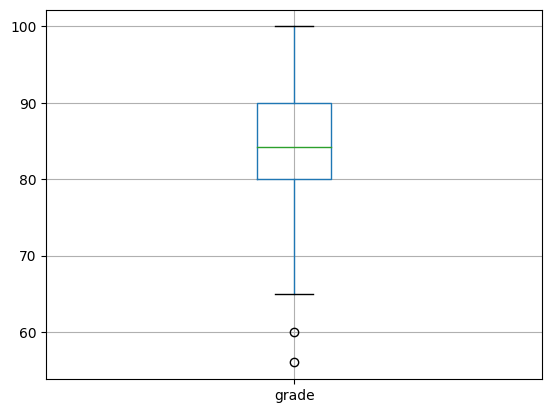

In [19]:
df.boxplot(column='grade')

# Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
x=df['student_id'].values
y=df['grade'].values

In [22]:
import sklearn

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
X=x.reshape(-1, 1)

In [25]:
Y=y.reshape(-1,1)

In [26]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.1, random_state=12)


In [28]:
from sklearn.metrics import recall_score  # since the dataset is small, this is to enlarge the dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_test,y_test)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**Random Forest Classifier**

In [31]:
rfc=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [32]:
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [33]:
y_pred=rfc.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

80.0


**Random Forest Regressor**

In [34]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(n_estimators = 10 ,random_state = 0)
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)

In [35]:
y_pred

array([11.4, 14.4, 11.4, 13.6, 11.3])

In [36]:
reg_rf.score(x_train, y_train)*100

37.88961038961038

In [37]:
reg_rf.score(x_test, y_test)*100

37.88961038961038

**SVM**

In [38]:
from sklearn import svm

In [39]:
model1 = svm.SVC(kernel='rbf', random_state=100, gamma = "scale", decision_function_shape="ovr", max_iter=15000)
model1.fit(x_train, y_train)

SVC(max_iter=15000, random_state=100)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred= model1.predict(x_test)
print("\nSVM Accuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nClassification report is\n",classification_report(y_test,y_pred))


SVM Accuracy is  80.0 

Classification report is
               precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
